# Project

The goal of this project is to check if you understand the PCA and KMeans algorithms that we covered in class.

We will walk you through computing the principal components of a matrix that shows the nutrient composition of pizzas of different brands.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_theme()

## Loading and understanding the data

### Exercise 1

In the Google Drive of the course, you will find a file called `Pizza.csv`. Load it into this notebook and

1. create a `pandas` DataFrame called `pizza`
2. Drop the `id` column.
3. Print the first 10 rows.

In [2]:
# Your code here:
pizza = pd.read_csv("pizza.csv", delimiter=",")
pizza = pizza.drop(['id'], axis=1)
pizza.head(10)

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,27.72,21.19,45.29,5.16,1.66,0.64,4.95


### Exercise 2

Print a numerical summary of each column using the `describe` method.

In [3]:
for column in pizza.columns:
    print(f"Describe for {column}:")
    print(pizza[column].describe())
    print()

Describe for brand:
count     300
unique     10
top         H
freq       33
Name: brand, dtype: object

Describe for mois:
count    300.000000
mean      40.903067
std        9.552987
min       25.000000
25%       30.902500
50%       43.300000
75%       49.115000
max       57.220000
Name: mois, dtype: float64

Describe for prot:
count    300.000000
mean      13.373567
std        6.434392
min        6.980000
25%        8.060000
50%       10.440000
75%       20.022500
max       28.480000
Name: prot, dtype: float64

Describe for fat:
count    300.000000
mean      20.229533
std        8.975658
min        4.380000
25%       14.770000
50%       17.135000
75%       21.435000
max       47.200000
Name: fat, dtype: float64

Describe for ash:
count    300.000000
mean       2.633233
std        1.269724
min        1.170000
25%        1.450000
50%        2.225000
75%        3.592500
max        5.430000
Name: ash, dtype: float64

Describe for sodium:
count    300.000000
mean       0.669400
std        

### Exercise 3

Let's inspect the dataset visually.

1. Get all scatter plots by pairs, and illuminate by the brand. (Hint: `sns.pairplot`. Pass the `corner=True` keyword argument :) )
2. Get a correlation matrix for the `pizza` dataframe, and plot it using the `heatmap` function inside `sns`.

/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


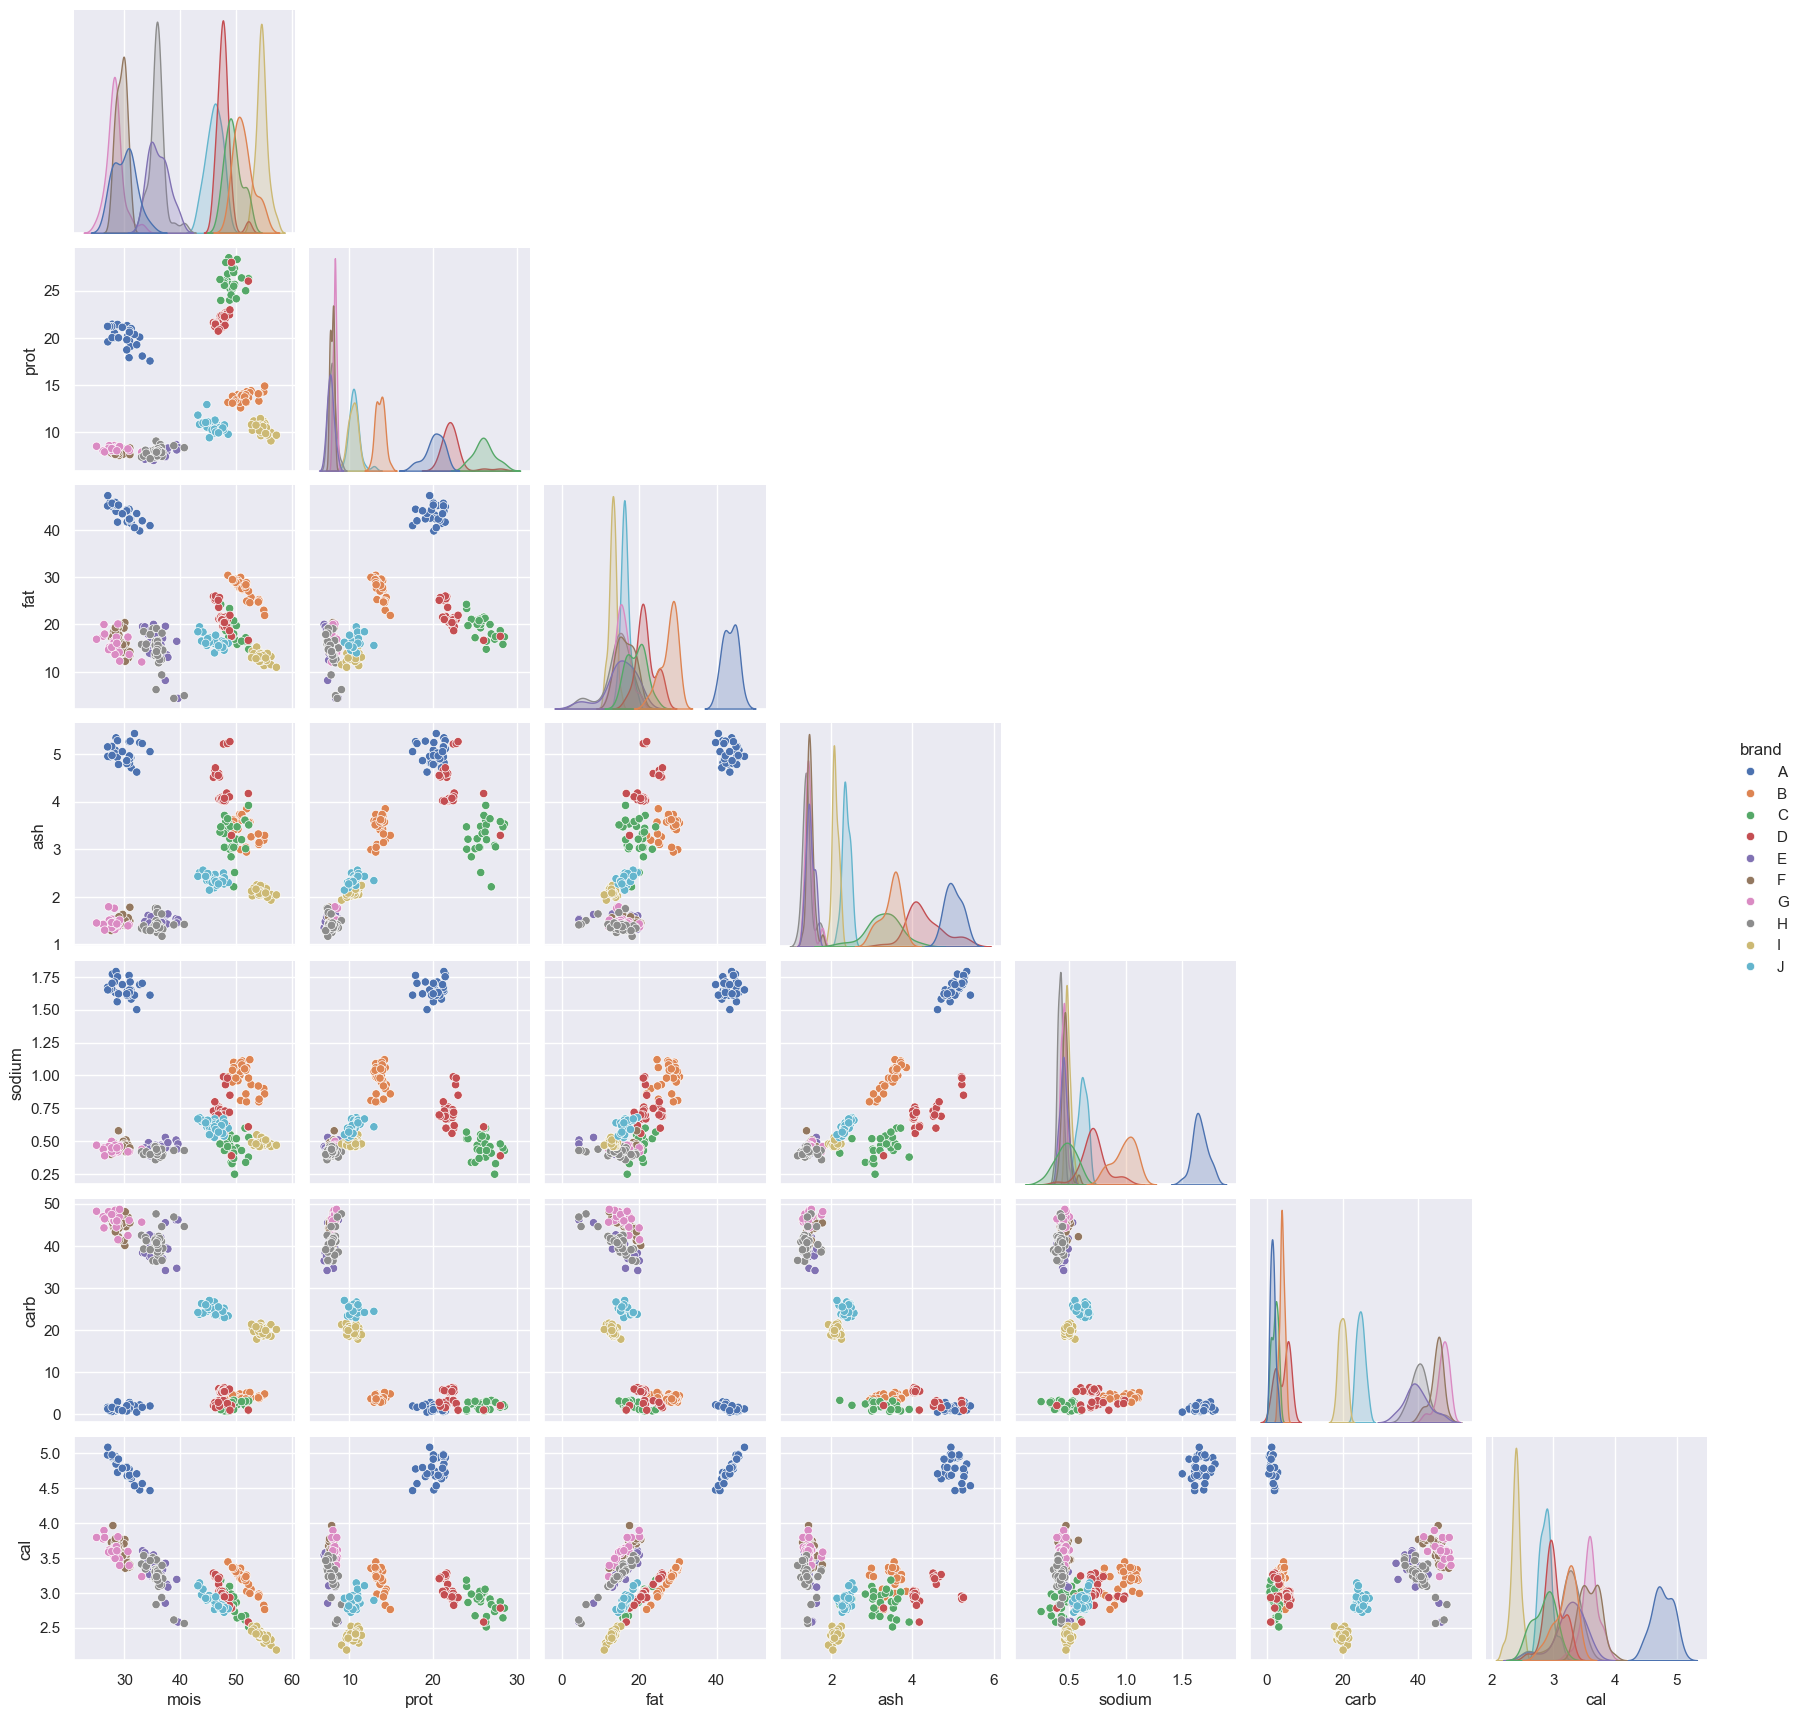

In [4]:
# Your code for 3.1 here:
sns.pairplot(pizza, hue="brand", corner=True)

<Axes: >

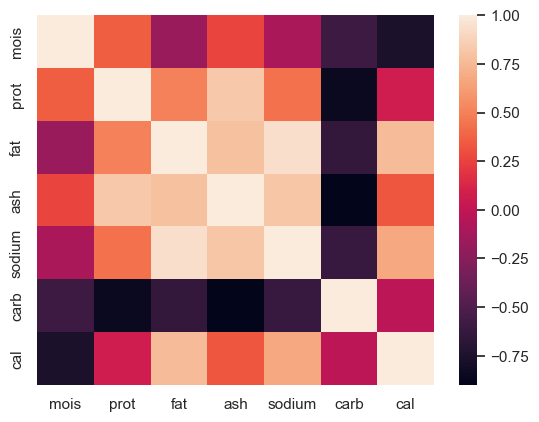

In [5]:
# Your code for 3.2 here
corr = pizza.select_dtypes('number').corr()
sns.heatmap(corr)

## Getting the principal components

Now let's use `sklearn` to get the principal components of this data.

### Exercise 4

From `sklearn.decomposition` import `PCA`.

In [6]:
# Your code here:
from sklearn.decomposition import PCA

### Exercise 5

Prepare your data for PCA:

1. Define an array `X` with the contents of the `pizza` DataFrame, except for the column `brand`. Print it and compare with the original `pizza` DataFrame (Hint `.values`).
2. Scale your data using a standard scaler and print it. Import what you need.

In [7]:
# Your code for 5.1 here
X = pizza.drop(['brand'], axis=1)
X = X.to_numpy()
print('pizza values: ', pizza.values)

print('--------------')

print('x values: ', X)

pizza values:  [['A' 27.82 21.43 ... 1.77 0.77 4.93]
 ['A' 28.49 21.26 ... 1.79 1.02 4.84]
 ['A' 28.35 19.99 ... 1.63 0.8 4.95]
 ...
 ['J' 44.55 11.01 ... 0.64 25.98 2.92]
 ['J' 47.6 10.43 ... 0.56 24.47 2.76]
 ['J' 46.84 9.91 ... 0.57 25.48 2.81]]
--------------
x values:  [[27.82 21.43 44.87 ...  1.77  0.77  4.93]
 [28.49 21.26 43.89 ...  1.79  1.02  4.84]
 [28.35 19.99 45.78 ...  1.63  0.8   4.95]
 ...
 [44.55 11.01 16.03 ...  0.64 25.98  2.92]
 [47.6  10.43 15.18 ...  0.56 24.47  2.76]
 [46.84  9.91 15.5  ...  0.57 25.48  2.81]]


In [8]:
# Your code for 5.2 here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.37181459  1.25418127  2.74984143 ...  2.97668662 -1.22751105
   2.68012924]
 [-1.30156227  1.22771661  2.64047481 ...  3.03077869 -1.21362189
   2.53473344]
 [-1.31624186  1.03000998  2.85139615 ...  2.59804213 -1.22584435
   2.71243942]
 ...
 [ 0.3823963  -0.36794707 -0.46866201 ... -0.07951534  0.1730719
  -0.56704362]
 [ 0.70220164 -0.45823828 -0.56352082 ... -0.29588362  0.08918137
  -0.82552504]
 [ 0.62251244 -0.53918903 -0.52780927 ... -0.26883759  0.14529358
  -0.7447496 ]]


### Exercise 6

Create a PCA instance, call it `pca`. Fit it with the data X.

In [9]:
# Your code here
pca = PCA()
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


### Exercise 7

What are the explained variances of the principal components? What are the explained variance ratios? Print both of them.

In [10]:
print("Explained variances:", pca.explained_variance_)
print("--------------")
print("Explained variance ratios (i %):", pca.explained_variance_ratio_)

Explained variances: [4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
--------------
Explained variance ratios (i %): [5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]


Expected answer:
```
[4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
```

### Exercise 8

Get two line plots using seaborn. Give them appropiate titles and make them pretty. :)
1. One with the explained variance per principal component
2. One with the **cumulative** explained ratios.

<Axes: >

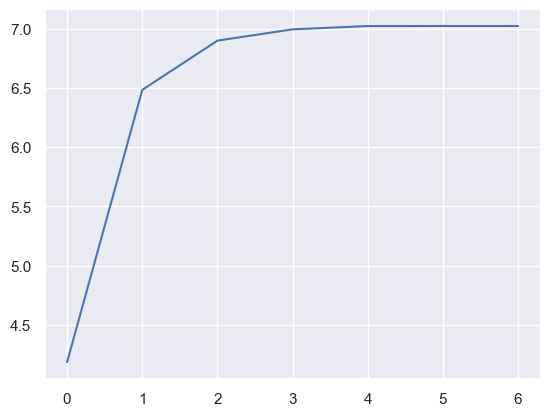

In [11]:
# Your code for 8.1 here
cumulative_sum = np.cumsum(pca.explained_variance_)
sns.lineplot(cumulative_sum)

<Axes: >

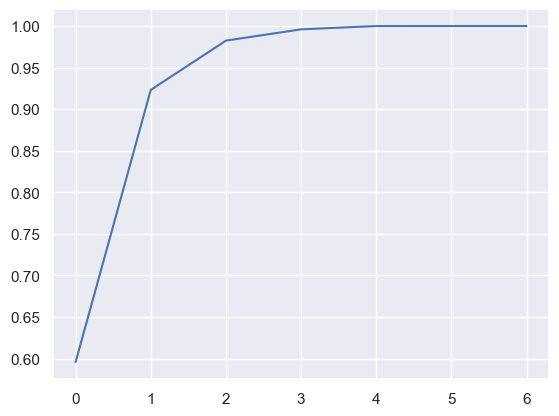

In [16]:
# Your code for 8.2 here
cumulative_sum_ratio = np.cumsum(pca.explained_variance_ratio_)
# get num of dimensions that encode at least 95% of information
num_dimensions_ratio = np.argmax(cumulative_sum_ratio >= 0.95) + 1
sns.lineplot(cumulative_sum_ratio)

### Exercise 9

If we want more than 90% explaned variance, how many principal components do we need? What about 95%?

Your answer here:

In [30]:
num_components_ninety = np.argmax(cumulative_sum_ratio >= 0.90) + 1
num_components_ninetyfive = np.argmax(cumulative_sum_ratio >= 0.95) + 1
print('Number of principal components for 90% is', num_components_ninety)
print('Number of principal components for 95% is', num_components_ninetyfive)

Number of principal components for 90% is 2
Number of principal components for 95% is 3


### Exercise 10

We will wrap up our PCA by showing the projection of all the data to the two principal components.

1. Create a new PCA object with `n_components=2`, call it `pca_2`, and fit it with `X`. Use the `transform` method to project the data to the plane. Call the output of `transform` an array `z`
2. Use `sns.scatterplot` with the first column of `z` as `x`, the second column of `z` as `y`, and `pizza["brand"]` as the `hue`.

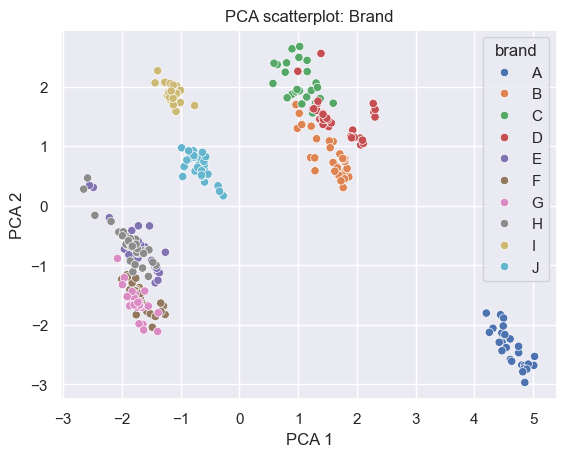

In [39]:
# Your code for 10.1 and 10.2 here
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)
z = pca_2.transform(X_scaled)

sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=pizza["brand"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA scatterplot: Brand")
plt.show()

## Comparing with KMeans

### Exercise 11

Let's assume we didn't know the brands, could we recover them using K-means clustering?

1. create a `KMeans` instance with `len(pizza["brand"].unique())` clusters, call it `kmeans`.
2. Fit it on the `z` that we just plotted in the last exercise.
3. Plot a `sns.scatterplot` with `hue` given by the cluster ids. Compare it with the plot from the previous exercise (Hint: `kmeans.labels_`)

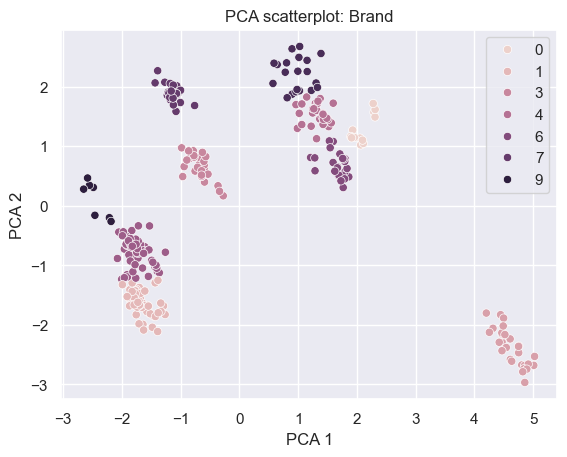

In [45]:
# Your code here.
from sklearn.cluster import KMeans

n_clusters = len(pizza["brand"].unique())
kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
kmeans.fit(z)

sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=kmeans.labels_)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA scatterplot: Brand")
plt.show()